# Quantitative Finance Applications using Python

In [1]:
# importing the main libraries (the rest of the libraries will be imported along the way)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import requests


First example is regarding an ARMA model using self-generated data

In [9]:
np.random.seed(1)
n = 365
time = pd.date_range(start = '2022-01-01', periods = n, freq='D')
random_walk = np.cumsum(np.random.normal(0,1, size = n))
daily_return = np.random.normal(-0.01 , 0.01, size = n)

value= 100 + 75 * (0.2*random_walk + 0.8*np.cumsum(daily_return))
data = pd.DataFrame({'Value': value, "Time": time}, index=time)

data.head()

,Value,Time
2022-01-01,124.201869,2022-01-01
2022-01-02,114.734567,2022-01-02
2022-01-03,104.542470,2022-01-03
2022-01-04,88.198728,2022-01-04
2022-01-05,100.774407,2022-01-05


In [12]:
from quant_finance_functions import plot_time_series

TypeError: title() missing 1 required positional argument: 'label'

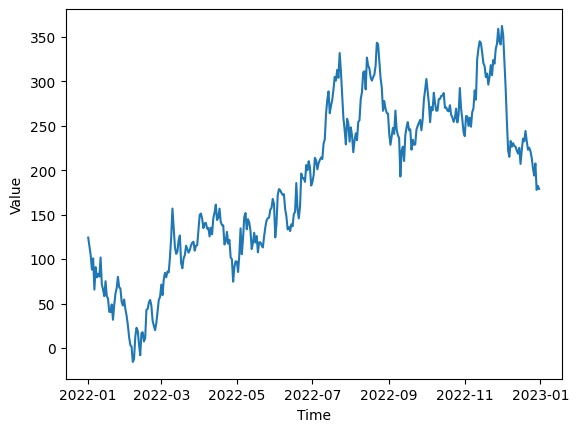

In [14]:
plot_time_series(data['Time'], data['Value'], )


The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or non-stationary. A stationary time series is one in which the statistical properties such as the mean, variance, and autocorrelation do not change over time. A non-stationary time series, on the other hand, has statistical properties that change over time, such as a trend or seasonality.

The ADF test is a modification of the Dickey-Fuller test, which tests for the presence of a unit root in a time series. A unit root is a root of the autoregressive characteristic equation that is equal to 1. If a time series has a unit root, it is non-stationary. The ADF test adds additional terms to the Dickey-Fuller test regression equation to account for higher-order autocorrelations in the data.

The ADF test involves estimating a regression equation of the form:

Δy(t) = α + βt + γy(t-1) + ΣδiΔy(t-i) + ε(t)

where:

Δy(t) is the first difference of the time series.
α is a constant.
β is the coefficient of time.
γ is the coefficient of lagged y.
ΣδiΔy(t-i) is the sum of the coefficients of the lagged differences.
ε(t) is the error term.

The null hypothesis of the ADF test is that the time series has a unit root, which means it is non-stationary. The test calculates a p-value, and if the p-value is less than the significance level (usually 0.05), then the null hypothesis is rejected, and the data is considered to be stationary. If the p-value is greater than or equal to the significance level, then the null hypothesis is not rejected, and the data is considered to be non-stationary.

If the data is non-stationary, it may be necessary to apply a transformation or differencing to make it stationary before using it as input to a time series model.

In [3]:
from quant_finance_functions import check_stationarity

In [4]:
check_stationarity(data)

False

In [5]:
from quant_finance_functions import time_series_summary

In [7]:
time_series_summary(data['Value'])

,count,mean,std,min,25%,50%,75%,max
0,365,185.839634,92.044846,-15.707555,115.334419,194.326376,262.169277,362.318411
